Name: plot_refc.ipynb

Author: Robert M. Frost

NOAA Global Systems Laboratory

Created: 28 June 2023

Purpose: Plot composite reflectivity utilizing read_grib from plotting_functions.py

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf
import numpy as np
from metpy.plots import ctables
from plotting_functions import read_grib

Read in composite reflectivity data

In [7]:
# hour of interest
hr = 18
# directory where hrrr grib data are located
dgrib_h = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/"
# directory where rap grib data are located
dgrib_r = "/scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/"
# natlev or prslev
nat_prs = "prslev"
# message number for composite reflectivity
mn_refc = 40
# directory for figure to be output
figdir = "/scratch2/BMC/fv3lam/Robby.Frost/figures/20190520/refc/"

In [8]:
# read in data
refc_h, lat, lon, valid_date = read_grib(hr, dgrib_h, nat_prs, mn_refc)
refc_r = read_grib(hr, dgrib_r, nat_prs, mn_refc, array_only=True)

Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_hrrrphys/2019052000/postprd/rrfs.t00z.prslev.f018.rrfs_conuscompact_3km.grib2
Finished reading in Maximum/Composite radar reflectivity
Reading in /scratch2/BMC/fv3lam/Robby.Frost/expt_dirs/2019052000_3km_rapphys/2019052000/postprd/rrfs.t00z.prslev.f018.rrfs_conuscompact_3km.grib2
Finished reading in Maximum/Composite radar reflectivity


Side by side reflectivity plot

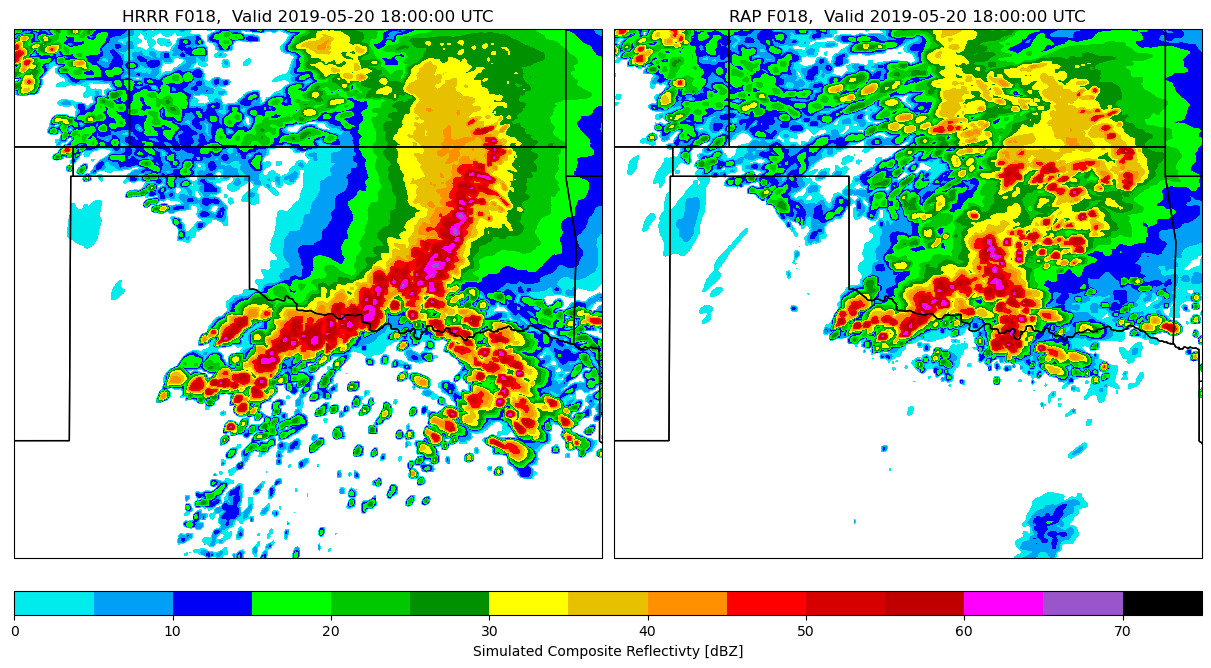

In [9]:
# Define your custom colorbar bounds
cbar_min = 0
cbar_max = 75.1
# set reflectivity levels to be plotted
clevs = np.arange(cbar_min, cbar_max, 5)
# define color table using metpy colortables
colors = ctables.registry.get_colortable('NWSReflectivity')

# create plot
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12,6.7), constrained_layout=True)

# mapping
plt_area = [-104, -94, 30, 39] # W, E, S, N
for i, iax in enumerate(ax):
    iax.coastlines()
    iax.add_feature(cpf.BORDERS)
    iax.add_feature(cpf.STATES)
    iax.set_extent(plt_area)

# plot HRRR
c0 = ax[0].contourf(lon, lat, refc_h.values, clevs, 
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)
# plot RAP
c1 = ax[1].contourf(lon, lat, refc_r.values, clevs,
                    transform=ccrs.PlateCarree(), 
                    cmap=colors)

# add axes titles
ax[0].set_title(f"HRRR F0{hr},  Valid {valid_date} UTC")
ax[1].set_title(f"RAP F0{hr},  Valid {valid_date} UTC")

# Add colorbar
cbar = fig.colorbar(c0, ax=ax, orientation='horizontal', extend=True, pad=0.05, aspect=50)
cbar.set_label('Simulated Composite Reflectivty [dBZ]')

# save figure
plt.savefig(f"{figdir}refc_sidebyside_f{hr}.png")
plt.show()
plt.close()